# naive bayes

In [ ]:
# importing the required modules

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
df=pd.read_csv("/content/drug200.csv")
print(df.head(3))
print(df.columns)

   Age Sex    BP Cholesterol  Na_to_K   Drug
0   23   F  HIGH        HIGH   25.355  DrugY
1   47   M   LOW        HIGH   13.093  drugC
2   47   M   LOW        HIGH   10.114  drugC
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
# converting catergorical data to numerical

label_encoder = LabelEncoder()

for col in df.columns:
  df[col]=label_encoder.fit_transform(df[col])

print(df.head(3))

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0    8    0   0            0      167     0
1   30    1   1            0       89     3
2   30    1   1            0       43     3


In [ ]:
# splitting target and data

X_data = df.iloc[:,:-1].values
Y_data = df.iloc[:,-1].values

In [ ]:
# splitting to train and test

x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.3,random_state=42)

In [ ]:
# fitting into the model

gauss_nb_model = GaussianNB()
gauss_nb_model.fit(x_train,y_train)

GaussianNB()

In [ ]:
# predictions
y_predictions = gauss_nb_model.predict(x_test)

In [ ]:
# accuracy score
accr = accuracy_score(y_test,y_predictions)
print(f"ACCURACY : {accr*100}%")

ACCURACY : 88.33333333333333%


In [ ]:
# confusion matrix
cm=confusion_matrix(y_test,y_predictions)
print("CONFUSION MATRIX :\n",cm)

tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(f"PRECISION : {precision*100}%")
print(f"RECALL : {recall*100}%")

CONFUSION MATRIX :
 [[19  2  3  2  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]
PRECISION : 90.47619047619048%
RECALL : 100.0%


# ensembling methods

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("drug200.csv")

In [ ]:
encoded_val=[]
cols=['Sex','BP','Cholesterol','Drug']
le = LabelEncoder()
for col in cols:
  df[col]=le.fit_transform(df[col])

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = [
    ["Decision Tree" , DecisionTreeClassifier(random_state=42)],
    ["Random Forest" , RandomForestClassifier(random_state=42)],
    ["Bagging" , BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)],
    ["Boosting (AdaBoost)" ,AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)],
    ["Voting" , VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('bag', BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)),
    ('boost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42))
    ], voting='hard')]
]

In [ ]:
answer = []
for model_name,model in models:
  model.fit(X_train,y_train)
  y_predictions = model.predict(X_test)
  acc = accuracy_score(y_test,y_predictions)

  answer.append([model_name,acc*100])


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print(answer)
d = pd.DataFrame(answer,columns=["Model","Accuracy"])
print(d)

[['Decision Tree', 100.0], ['Random Forest', 100.0], ['Bagging', 100.0], ['Boosting (AdaBoost)', 100.0], ['Voting', 100.0]]
                 Model  Accuracy
0        Decision Tree     100.0
1        Random Forest     100.0
2              Bagging     100.0
3  Boosting (AdaBoost)     100.0
4               Voting     100.0


#SVM


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC

In [22]:

data = load_digits()

X= data.data
y= data.target

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 ,random_state=0)

In [ ]:
model = SVC(gamma=0.001,C=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

In [ ]:
#printing the predicted and the actual values
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [26]:
# printing the accuracy, precision and recall
accr = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(cm)
tp,fp,fn = cm[0][0],cm[0][1],cm[1][0]

prec = tp/(tp+fp)
recall = tp/(tp+fn)

print(f"ACCURACY : {accr*100}%")
print(f"PRECISION : {prec*100}%")
print(f"RECALL : {recall*100}%")

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
ACCURACY : 99.33333333333333%
PRECISION : 100.0%
RECALL : 100.0%


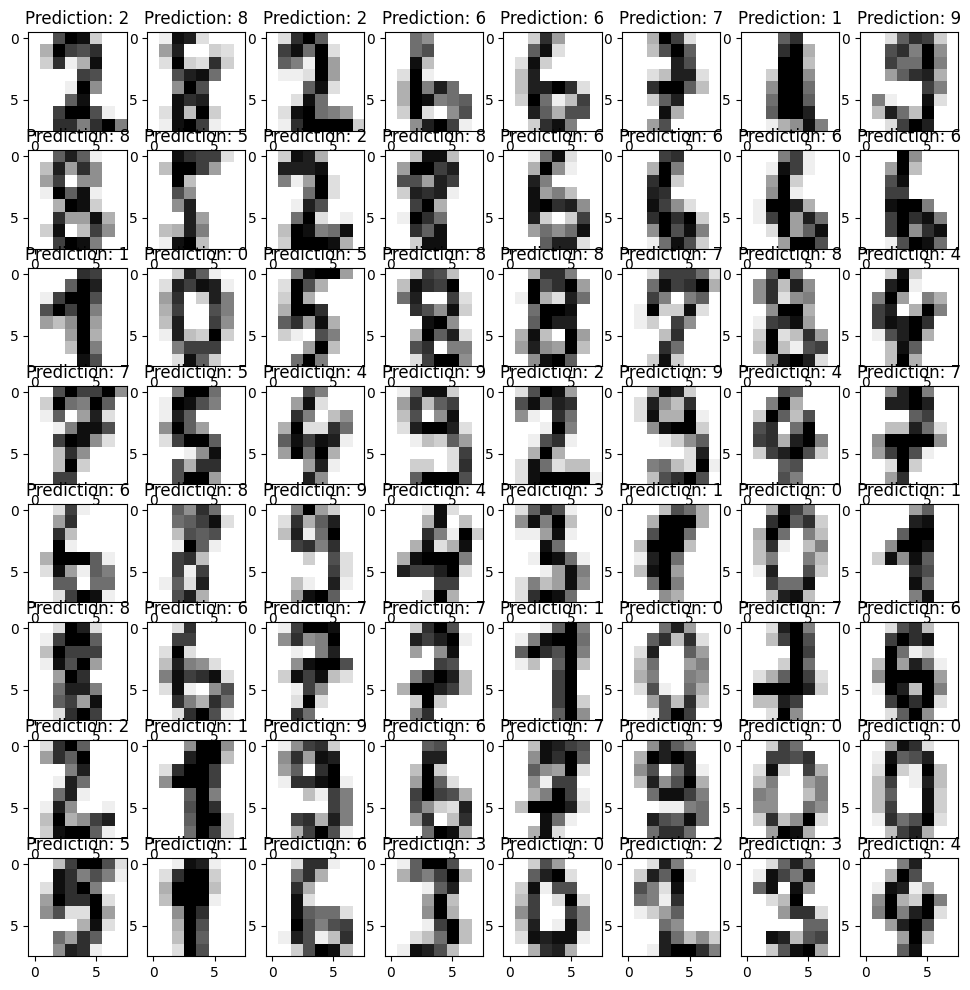

In [27]:
fig1, axes1 = plt.subplots(8, 8, figsize=(12,12))

for axis, images, prediction in zip(axes1.flat, x_test, y_pred):
  images = images.reshape(8, 8)  # Reshape back to 8x8 for display
  axis.imshow(images,cmap='binary')
  # axis.set(xticks=[],yticks=[])
  axis.set_title(f'Prediction: {prediction}')

# Gradient Descent Algorithm using tf

Optimized theta:
[[4.498443 ]
 [2.9966152]]


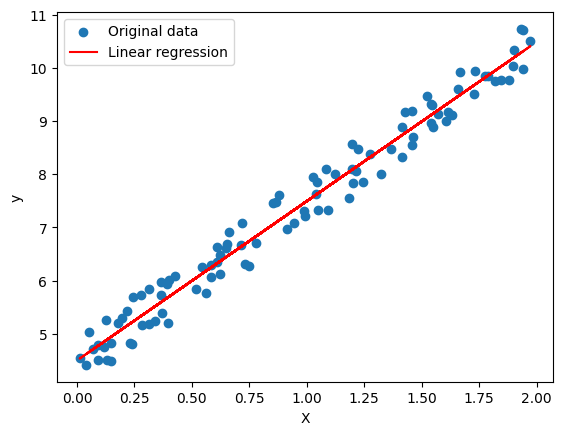

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# Add a bias term to the input features (concatination)
X_b = np.c_[np.ones((100, 1)), X]

# Convert NumPy arrays to TensorFlow tensors
X_tensor = tf.constant(X_b, dtype=tf.float32)
y_tensor = tf.constant(y, dtype=tf.float32)

# Set random seed for reproducibility
tf.random.set_seed(42)

# Initialize random values for the model parameters
theta = tf.Variable(tf.random.normal(shape=(2, 1)))

# Define the linear regression model
def linear_regression(X, theta):
    return tf.matmul(X, theta)

# Define the mean squared error (MSE) loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the learning rate and the number of iterations
learning_rate = 0.01
n_iterations = 1000

# Implement the gradient descent algorithm
for iteration in range(n_iterations):
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X_tensor, theta)
        loss = mean_squared_error(y_tensor, y_pred)

    gradients = tape.gradient(loss, [theta])[0]
    theta.assign(theta - learning_rate * gradients)

# Print the optimized parameters
print("Optimized theta:")
print(theta.numpy())

# Plot the original data and the linear regression line
plt.scatter(X, y, label="Original data")
plt.plot(X, theta[0] + theta[1] * X, color='red', label="Linear regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()